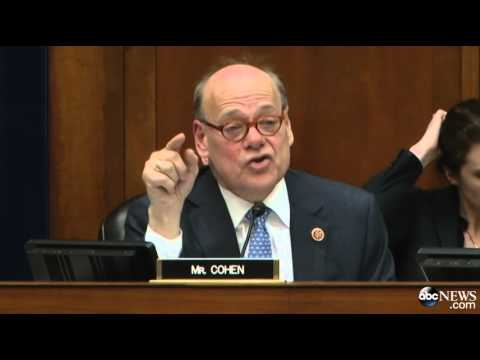

In [1]:
from IPython.display import YouTubeVideo
import os
from io import StringIO
import requests
import requests
import json
import csv
import sqlite3
import sys
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")



YouTubeVideo('wOU_3wsc35s')

In [2]:
url = ['https://raw.githubusercontent.com/MedCabinet/ML_Machine_Learning_Files/master/med1.csv', 
       'https://raw.githubusercontent.com/MedCabinet/Weed-Calculator/master/Clean_Data/cbd.csv',
       'https://raw.githubusercontent.com/MedCabinet/Weed-Calculator/master/Clean_Data/feels.csv',
       'https://raw.githubusercontent.com/MedCabinet/Weed-Calculator/master/Clean_Data/hurts.csv',
       'https://raw.githubusercontent.com/MedCabinet/Weed-Calculator/master/Clean_Data/reviews.csv',
       'https://raw.githubusercontent.com/MedCabinet/Weed-Calculator/master/Clean_Data/terps.csv',
       'https://raw.githubusercontent.com/MedCabinet/Weed-Calculator/master/Clean_Data/thc.csv']



for i,x in enumerate(url):
    df = pd.read_csv(url[0])
    df_cbd = pd.read_csv(url[1])
    df_feels = pd.read_csv(url[2])
    df_hurts = pd.read_csv(url[3])
    df_reviews = pd.read_csv(url[4])
    df_terps = pd.read_csv(url[5])
    df_thc = pd.read_csv(url[6])

dataframes = [df, df_cbd, df_feels, 
              df_hurts, df_reviews, 
              df_terps, df_thc]

df_names = ['df', 'df_cbd', 'df_feels',
            'df_hurts', 'df_reviews',
            'df_terps', 'df_thc']

dfs = dict(zip(df_names, dataframes))



In [3]:
def dataframe_var():
    url = ['https://raw.githubusercontent.com/MedCabinet/ML_Machine_Learning_Files/master/med1.csv',
    'https://raw.githubusercontent.com/MedCabinet/Weed-Calculator/master/Clean_Data/cbd.csv',
    'https://raw.githubusercontent.com/MedCabinet/Weed-Calculator/master/Clean_Data/feels.csv',
    'https://raw.githubusercontent.com/MedCabinet/Weed-Calculator/master/Clean_Data/hurts.csv',
    'https://raw.githubusercontent.com/MedCabinet/Weed-Calculator/master/Clean_Data/reviews.csv',
    'https://raw.githubusercontent.com/MedCabinet/Weed-Calculator/master/Clean_Data/terps.csv',
    'https://raw.githubusercontent.com/MedCabinet/Weed-Calculator/master/Clean_Data/thc.csv']
    
    for i,x in enumerate(url):
        df = pd.read_csv(url[0])
        df_cbd = pd.read_csv(url[1])
        df_feels = pd.read_csv(url[2])
        df_hurts = pd.read_csv(url[3])
        df_reviews = pd.read_csv(url[4])
        df_terps = pd.read_csv(url[5])
        df_thc = pd.read_csv(url[6])
        
    dataframes = [df, df_cbd, df_feels,
    df_hurts, df_reviews,
    df_terps, df_thc]
    
    df_names = ['df', 'df_cbd', 'df_feels',
    'df_hurts', 'df_reviews',
    'df_terps', 'df_thc']
    
    dfs = dict(zip(df_names, dataframes))
    
    return dataframes, df_names, dfs

In [4]:
# dataframes, df_names, dfs = dataframe_var()

In [5]:
#Removing extended index column / consistency formatting
for k, v in dfs.items():
    
    if 'Unnamed: 0' in v.columns:
        v.drop(['Unnamed: 0'], axis=1,inplace=True)
    v.columns = map(str.lower, v.columns)
    if 'strain' in v.columns:
        v['strain'] = v['strain'].str.lower()
        

In [6]:
def merge_func():
    global df
    df = pd.merge(df, df_thc, on='strain')
    df = pd.merge(df, df_cbd, on='strain')
    df = pd.merge(df, df_terps, on='strain')
    df.rename(columns={'high_x': 'thc_high','low_x':'thc_low','high_y':'terp_high','low_y':'terp_low'},inplace=True)
    df.drop(columns=['description','flavor','rating','effects'],inplace=True)
    return df
    

In [7]:
if len(df.columns) == 6:
    merge_func()

In [8]:
"""
G = grams of cannabis
P = potency in milligrams of THC
S = strength of cannabis in percent


P = 10 (G & S)
"""

'\nG = grams of cannabis\nP = potency in milligrams of THC\nS = strength of cannabis in percent\n\n\nP = 10 (G & S)\n'

In [192]:
def calc():
    while True:
        try:
            G = float(input('Quantity of Grams: '))
            if G < .001 or G > 20:
                raise ValueError
                break
        except ValueError:
            print('Please choose a valid number of grams')
        break
    thc_high = 23 # assign variable values via strain selection
    thc_low = 44 # assign variable values via strain selection
    
    S = ((thc_high + thc_low)/2)
    P = 10 * (G * S)
    
    if S >= .2 and P > 0:
        print('Strain contains high THC content amount of:','{:,.0f}'.format(float(S)) + '%')
        print('Use contains a Potency Level of:','{}'.format(int(P)) + 'mg')
    elif S >= .10 or S <= .15 and P > 0:
        print('Strain contains mid-level THC content amount of:','{:,.2f}'.format(float(S)) + '%')
        print('Use contains a Potency Level of:','{}'.format(int(P)) + 'mg')
    elif S <= .05 and P > 0:
        print('Strain contains low-level THC content amount of:','{:,.0f}'.format(float(S)) + '%')
        print('Use contains a Potency Level of:','{}'.format(int(P)) + 'mg')
            
        

In [194]:
calc()

Quantity of Grams: 2
Strain contains high THC content amount of: 34%
Use contains a Potency Level of: 670mg


,strain,type,thc_high,thc_low,terp_high,terp_low,myrcene,pinene,caryophyllene,limonene,humulene,terpinolene,linalool,ocimene
0,24k-gold,hybrid,22,19,1,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3-kings,hybrid,19,14,1,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3x-crazy,indica,14,12,1,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,501st-og,hybrid,23,20,1,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,707-headband,hybrid,20,14,1,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [11]:
# cols = df.columns.values.tolist()
# df.rename(str.strip, axis='columns',inplace=True)
# df.rename(str.lower, axis='columns',inplace=True)
# df.rename(columns = lambda x: x.replace('type','strain_type')[0:],inplace = True)


In [12]:
# df['flavor'] = df['flavor'].fillna('Unknown')
# df['description'] = df['description'].fillna('Unknown')

In [13]:
# def str_clean(x):
#     df[x] = df[x].str.split(',')
#     df[x] = df[x].apply(lambda x:', '.join([str(i) for i in x]))

# str_clean('flavor')
# str_clean('effects')

In [14]:
# with sns.axes_style('white'):
#     sns.kdeplot(df['rating'])

In [15]:
# df['description'] = df.description.str.strip()

In [16]:
# import spacy
# nlp = spacy.load("en_core_web_lg")